Dataset Overview:

Customers Dataset Shape: (200, 4)
Products Dataset Shape: (100, 4)
Transactions Dataset Shape: (1000, 7)

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null  

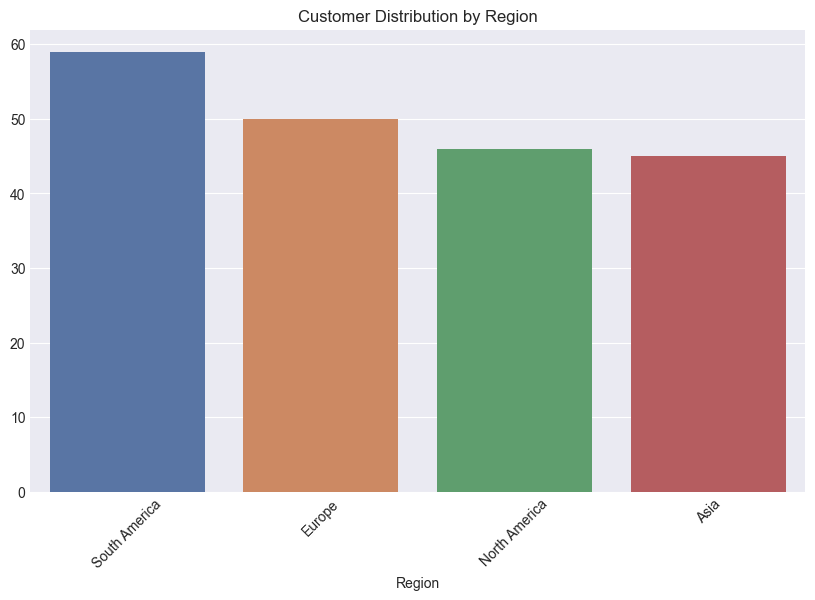

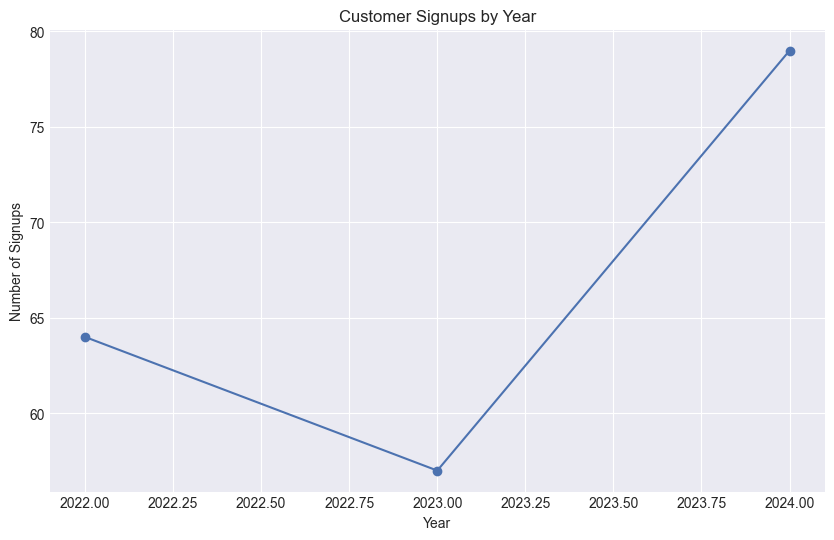


Product Analysis:

Product distribution by category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


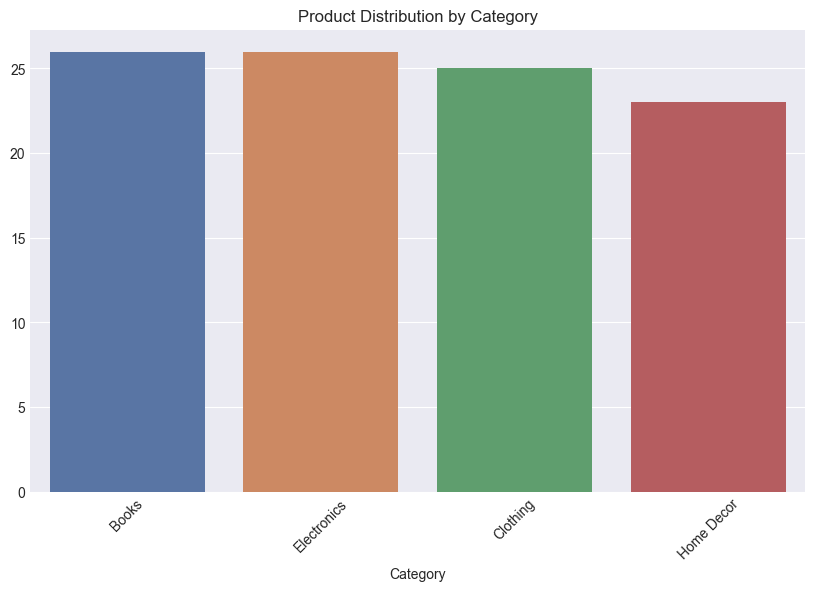

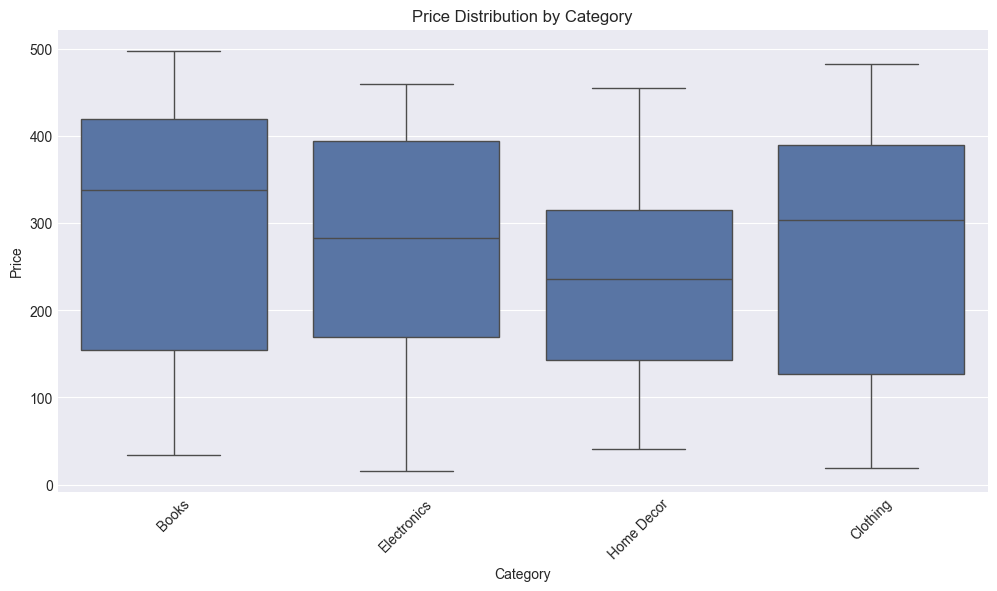


Transaction Analysis:


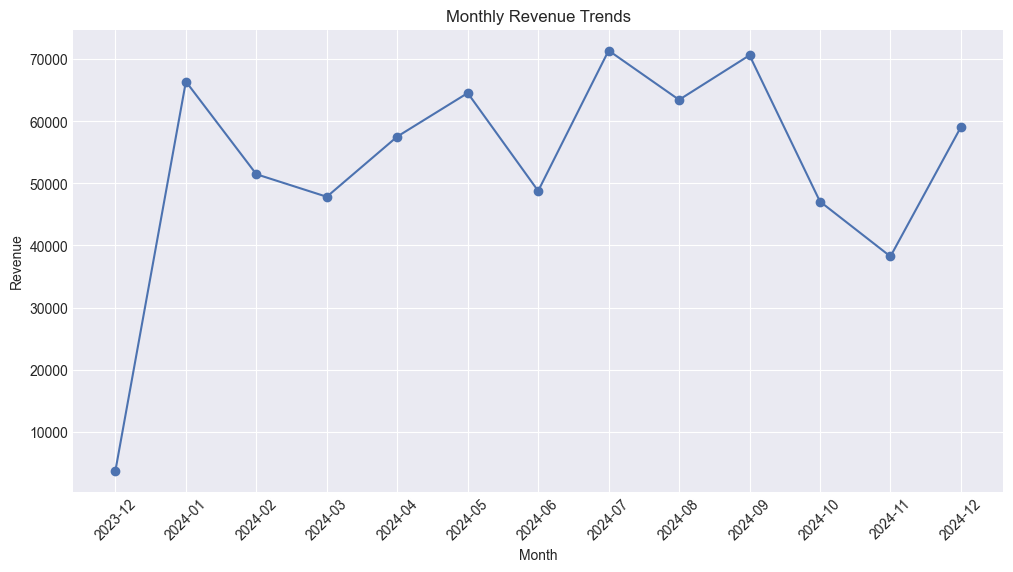

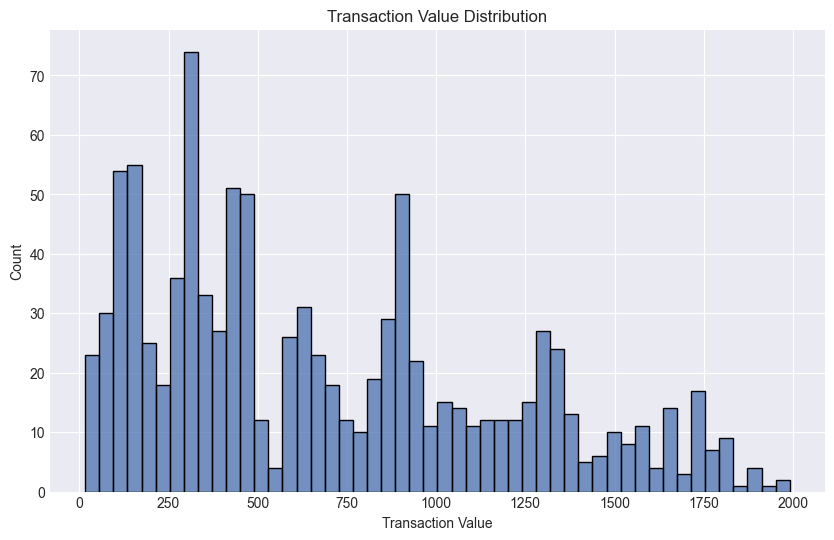

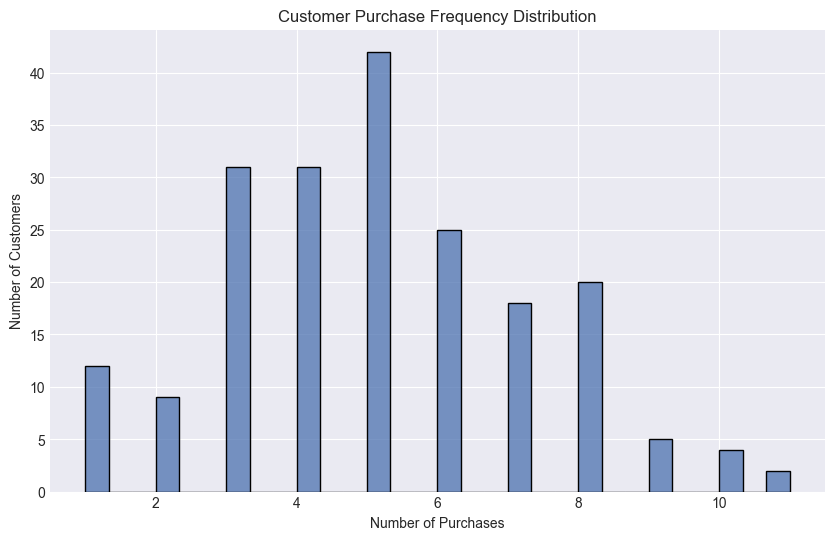

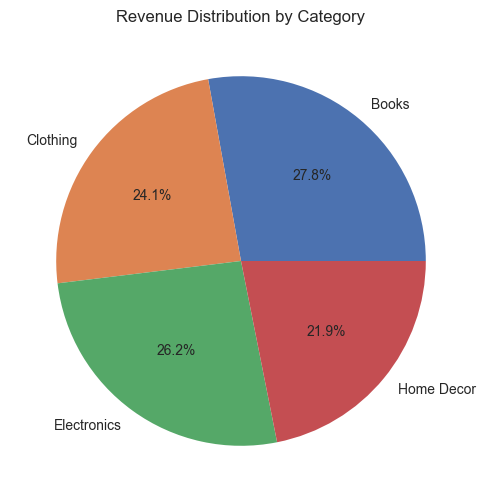

EDA and Business Insights PDF generated successfully!


In [12]:
# EDA.ipynb - Exploratory Data Analysis

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from fpdf import FPDF
import os

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = [12, 6]

# Load datasets
# Correct relative paths to move up one directory
customers_df = pd.read_csv('../data/Customers.csv')
products_df = pd.read_csv('../data/Products.csv')
transactions_df = pd.read_csv('../data/Transactions.csv')

# Initial data exploration
print("Dataset Overview:")
print("\nCustomers Dataset Shape:", customers_df.shape)
print("Products Dataset Shape:", products_df.shape)
print("Transactions Dataset Shape:", transactions_df.shape)

# Data types and missing values check
print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nMissing values in Customers dataset:")
print(customers_df.isnull().sum())

print("\nProducts Dataset Info:")
print(products_df.info())
print("\nMissing values in Products dataset:")
print(products_df.isnull().sum())

print("\nTransactions Dataset Info:")
print(transactions_df.info())
print("\nMissing values in Transactions dataset:")
print(transactions_df.isnull().sum())

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Customer Analysis
print("\nCustomer Analysis:")
print("\nCustomer distribution by region:")
region_distribution = customers_df['Region'].value_counts()
print(region_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, hue=region_distribution.index, legend=False)
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# Customer signup trends
plt.figure(figsize=(10, 6))
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
yearly_signups = customers_df['SignupYear'].value_counts().sort_index()
plt.plot(yearly_signups.index, yearly_signups.values, marker='o')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

# Product Analysis
print("\nProduct Analysis:")
print("\nProduct distribution by category:")
category_distribution = products_df['Category'].value_counts()
print(category_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, hue=category_distribution.index, legend=False)
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Transaction Analysis
print("\nTransaction Analysis:")

# Monthly revenue trends
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions_df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Transaction value distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=50)
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Value')
plt.ylabel('Count')
plt.show()

# Customer purchasing behavior
customer_purchase_freq = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_freq, bins=30)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Category revenue analysis
category_revenue = transactions_df.merge(products_df, on='ProductID').groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Category')
plt.show()

# Save insights to PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="E-Commerce Business Insights", ln=1, align='C')

insights = [
    "Geographic Distribution: Significant regional variation suggests targeted expansion opportunities.",
    "Category Performance: The top-performing product category contributes a major share of revenue.",
    "Customer Behavior: Customers on average make X purchases per year with a mean transaction value of Y.",
    "Price Sensitivity: Price and sales volume correlation indicate optimization opportunities.",
    "Seasonal Trends: Peak sales occur in a specific month, highlighting inventory and marketing planning needs."
]

for insight in insights:
    pdf.multi_cell(0, 10, txt=insight)
    pdf.ln(5)

# Ensure directory exists before saving
output_path = "outputs/FirstName_LastName_EDA.pdf"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
pdf.output(output_path)

print("EDA and Business Insights PDF generated successfully!")
